# Régression logistique

In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import PolynomialFeatures , StandardScaler, RobustScaler
from sklearn.pipeline import make_pipeline
from warnings import filterwarnings

In [71]:
filterwarnings('ignore')

In [72]:
titanic = pd.read_csv('titanic_train.csv')

In [73]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [74]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [75]:
titanic.isnull().sum(axis=0)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

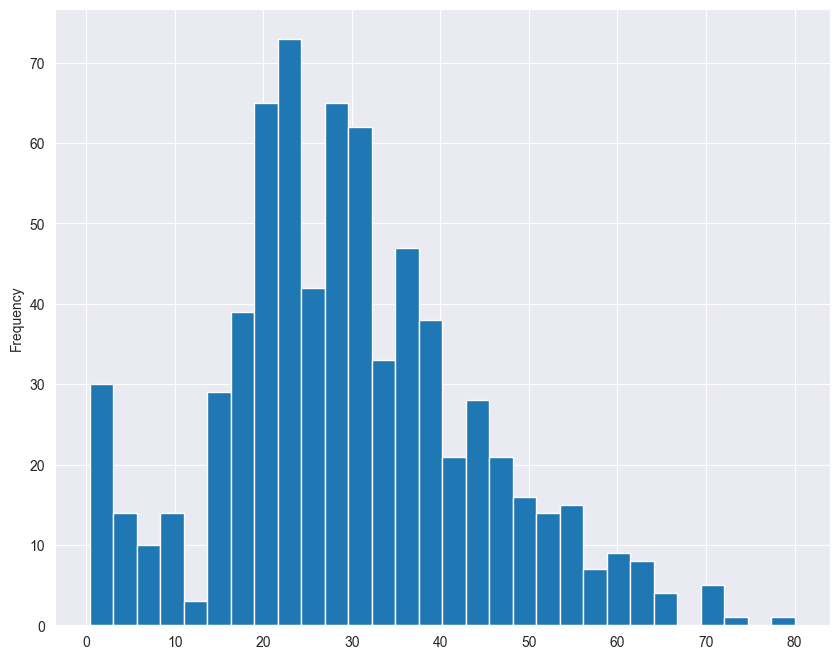

In [76]:
titanic['Age'].plot.hist(bins = 30, figsize = (10,8))
sns.set_style('darkgrid')

<Axes: ylabel='Frequency'>

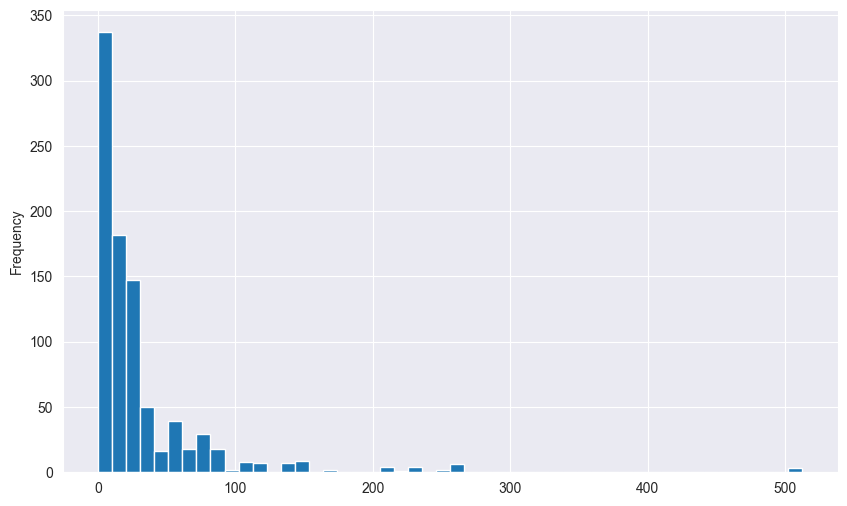

In [77]:
titanic['Fare'].plot.hist(bins = 50, figsize = (10,6))

<Axes: xlabel='Survived', ylabel='count'>

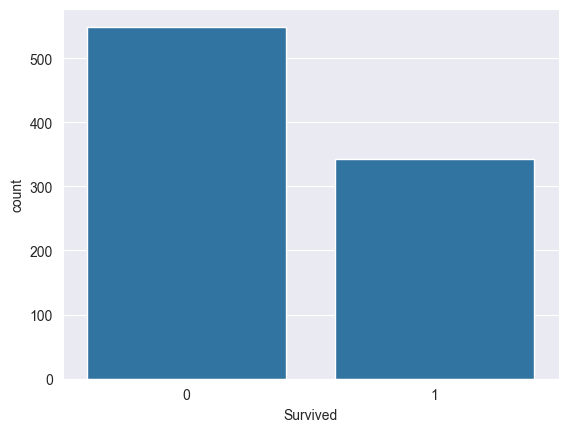

In [78]:
sns.countplot(x = 'Survived', data = titanic)

<Axes: xlabel='Survived', ylabel='count'>

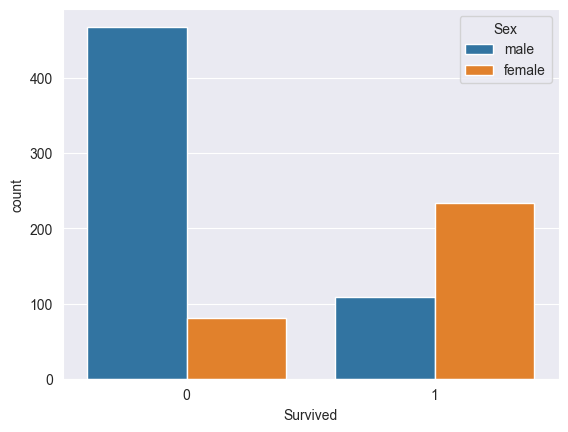

In [79]:
sns.countplot(x = 'Survived', hue = 'Sex', data = titanic)

<Axes: xlabel='Survived', ylabel='count'>

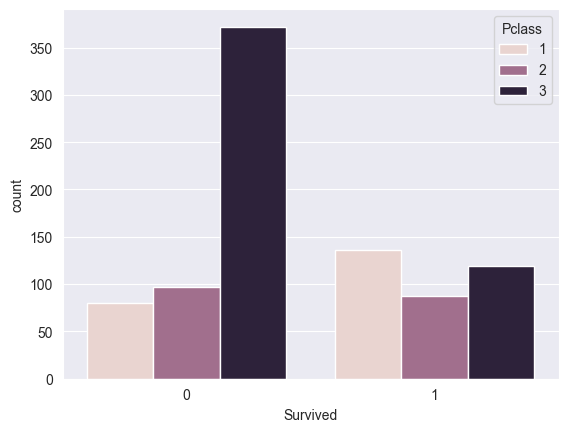

In [80]:
sns.countplot(x = 'Survived', hue = 'Pclass', data = titanic)

<Axes: xlabel='SibSp', ylabel='count'>

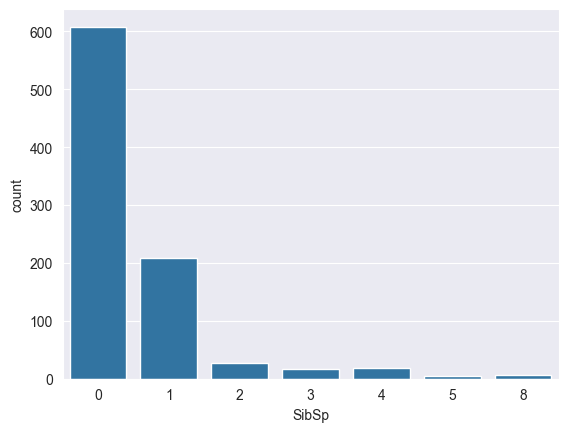

In [81]:
sns.countplot(x = 'SibSp', data = titanic)

<Axes: xlabel='Parch', ylabel='count'>

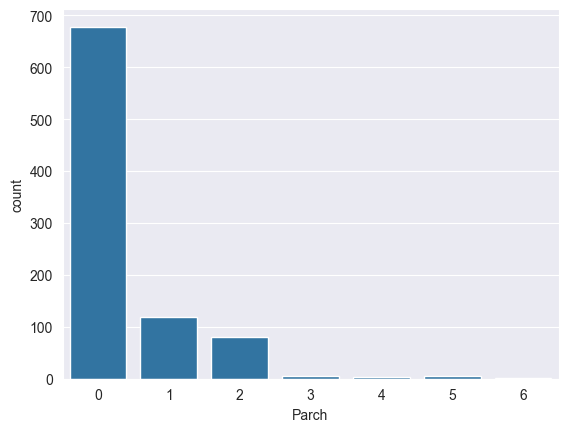

In [82]:
sns.countplot(x = 'Parch', data = titanic)

<Axes: xlabel='Pclass', ylabel='Age'>

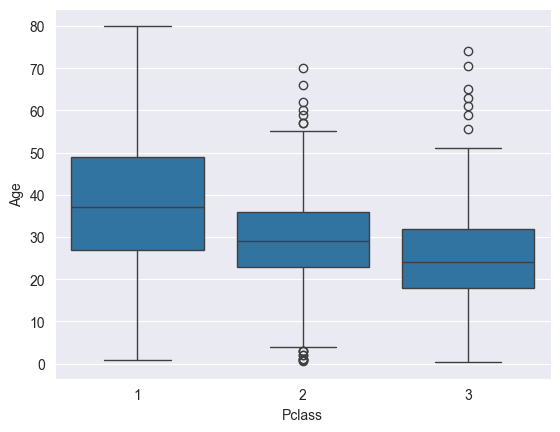

In [83]:
sns.boxplot(x = 'Pclass', y = 'Age', data = titanic)

In [84]:
titanic.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [85]:
titanic.iloc[: , 3]

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [86]:
titanic[["Pclass", "Age", "Parch", "SibSp", "Fare"]].groupby('Pclass').mean()

,Age,Parch,SibSp,Fare
Pclass,,,,
1,38.233441,0.356481,0.416667,84.154687
2,29.877630,0.380435,0.402174,20.662183
3,25.140620,0.393075,0.615071,13.675550


In [87]:
def imputer_age(DF1):
    Age = DF1['Age']
    Pclass = DF1['Pclass']
    if pd.isnull(Age):
        if Pclass == 1:
            return 38
        elif Pclass == 2:
            return 30
        else:
            return 25
    else:
        return Age

* apply est utilisé pour appliquer une fonction à chaque série du DataFrame (colonne ou ligne), en spécifiant l'axe.
* applymap est utilisé pour appliquer une fonction à chaque élément du DataFrame, sans spécifier d'axe.

In [88]:
titanic['Age'] = titanic[['Age','Pclass']].apply(imputer_age, axis=1)

In [89]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [90]:
titanic.drop(['Cabin'], axis = 1, inplace = True)

In [91]:
titanic.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [92]:
titanic.dropna(inplace = True)

In [93]:
titanic['Sex'].replace(['male','female'], [1,0], inplace = True)

In [94]:
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,25.0,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,111369,30.0000,C


In [95]:
titanic['Embarked'].replace(['S','C','Q'], [0,1,2], inplace = True)

In [96]:
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,1
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,0
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,0
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.0000,0
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.0000,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,25.0,1,2,W./C. 6607,23.4500,0
889,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,111369,30.0000,1


In [97]:
titanic.drop(['Name','Ticket','PassengerId'], axis =1, inplace = True)

In [98]:
titanic

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,0
1,1,1,0,38.0,1,0,71.2833,1
2,1,3,0,26.0,0,0,7.9250,0
3,1,1,0,35.0,1,0,53.1000,0
4,0,3,1,35.0,0,0,8.0500,0
...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,0
887,1,1,0,19.0,0,0,30.0000,0
888,0,3,0,25.0,1,2,23.4500,0
889,1,1,1,26.0,0,0,30.0000,1


In [99]:
X = titanic[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]

In [100]:
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,7.2500,0
1,1,0,38.0,1,0,71.2833,1
2,3,0,26.0,0,0,7.9250,0
3,1,0,35.0,1,0,53.1000,0
4,3,1,35.0,0,0,8.0500,0
...,...,...,...,...,...,...,...
886,2,1,27.0,0,0,13.0000,0
887,1,0,19.0,0,0,30.0000,0
888,3,0,25.0,1,2,23.4500,0
889,1,1,26.0,0,0,30.0000,1


In [101]:
y = titanic['Survived']

In [102]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 889, dtype: int64

In [103]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 100)
print('Données entrainment: ', X_train.shape)
print('données de test: ', X_test.shape)

Données entrainment:  (711, 7)
données de test:  (178, 7)


In [104]:
model = LogisticRegression()

In [105]:
model.fit(X_train, y_train)

LogisticRegression()

In [106]:
predictions = model.predict(X_test)

In [107]:
print('Score sur la base des données d\'apprentissage :', model.score(X_train, y_train))
print('Score sur la base des données de test:', model.score(X_test,y_test))

Score sur la base des données d'apprentissage : 0.8129395218002813
Score sur la base des données de test: 0.797752808988764


In [108]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.84      0.85      0.84       114
           1       0.73      0.70      0.71        64

    accuracy                           0.80       178
   macro avg       0.78      0.78      0.78       178
weighted avg       0.80      0.80      0.80       178



In [109]:
confusion_matrix(y_test, predictions)

array([[97, 17],
       [19, 45]], dtype=int64)

### Amélioration du modèle avec le  pipeline + GridSearchCV :

In [110]:
model = make_pipeline(PolynomialFeatures(), RobustScaler(), LogisticRegression())
print(model)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('robustscaler', RobustScaler()),
                ('logisticregression', LogisticRegression())])


In [111]:
grid_param = {  'polynomialfeatures__degree' : [2,3,4],
                'logisticregression__penalty': ['l1', 'l2', 'elasticnet'] ,
                'logisticregression__solver': ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'saga'],
                'logisticregression__C': [0.001,0.01,1,5,10,15,20,30,40,50,100,1000,10000,100000]}
                

In [112]:
grid = GridSearchCV(model, grid_param, cv=7, verbose = 20)

In [113]:
grid.fit(X_train,y_train)

Fitting 7 folds for each of 630 candidates, totalling 4410 fits
[CV 1/7; 1/630] START logisticregression__C=0.001, logisticregression__penalty=l1, logisticregression__solver=lbfgs, polynomialfeatures__degree=2
[CV 1/7; 1/630] END logisticregression__C=0.001, logisticregression__penalty=l1, logisticregression__solver=lbfgs, polynomialfeatures__degree=2;, score=nan total time=   0.0s
[CV 2/7; 1/630] START logisticregression__C=0.001, logisticregression__penalty=l1, logisticregression__solver=lbfgs, polynomialfeatures__degree=2
[CV 2/7; 1/630] END logisticregression__C=0.001, logisticregression__penalty=l1, logisticregression__solver=lbfgs, polynomialfeatures__degree=2;, score=nan total time=   0.0s
[CV 3/7; 1/630] START logisticregression__C=0.001, logisticregression__penalty=l1, logisticregression__solver=lbfgs, polynomialfeatures__degree=2
[CV 3/7; 1/630] END logisticregression__C=0.001, logisticregression__penalty=l1, logisticregression__solver=lbfgs, polynomialfeatures__degree=2;, sc

[CV 7/7; 3/630] END logisticregression__C=0.001, logisticregression__penalty=l1, logisticregression__solver=lbfgs, polynomialfeatures__degree=4;, score=nan total time=   0.1s
[CV 1/7; 4/630] START logisticregression__C=0.001, logisticregression__penalty=l1, logisticregression__solver=liblinear, polynomialfeatures__degree=2
[CV 1/7; 4/630] END logisticregression__C=0.001, logisticregression__penalty=l1, logisticregression__solver=liblinear, polynomialfeatures__degree=2;, score=0.608 total time=   0.0s
[CV 2/7; 4/630] START logisticregression__C=0.001, logisticregression__penalty=l1, logisticregression__solver=liblinear, polynomialfeatures__degree=2
[CV 2/7; 4/630] END logisticregression__C=0.001, logisticregression__penalty=l1, logisticregression__solver=liblinear, polynomialfeatures__degree=2;, score=0.608 total time=   0.0s
[CV 3/7; 4/630] START logisticregression__C=0.001, logisticregression__penalty=l1, logisticregression__solver=liblinear, polynomialfeatures__degree=2
[CV 3/7; 4/63

GridSearchCV(cv=7,
             estimator=Pipeline(steps=[('polynomialfeatures',
                                        PolynomialFeatures()),
                                       ('robustscaler', RobustScaler()),
                                       ('logisticregression',
                                        LogisticRegression())]),
             param_grid={'logisticregression__C': [0.001, 0.01, 1, 5, 10, 15,
                                                   20, 30, 40, 50, 100, 1000,
                                                   10000, 100000],
                         'logisticregression__penalty': ['l1', 'l2',
                                                         'elasticnet'],
                         'logisticregression__solver': ['lbfgs', 'liblinear',
                                                        'newton-cg',
                                                        'newton-cholesky',
                                                        'saga'],
                         'polynomialfeatures__degree': [2, 3, 4]},
             verbose=20)

In [114]:
grid.best_score_

0.811492913997282

In [115]:
grid.best_params_

{'logisticregression__C': 15,
 'logisticregression__penalty': 'l2',
 'logisticregression__solver': 'lbfgs',
 'polynomialfeatures__degree': 2}

In [116]:
model = grid.best_estimator_

### Prédiction avec le model amélioré :

In [117]:
print('Score sur la base des données d\'apprentissage :', model.score(X_train, y_train))
print('Score sur la base des données de test:', model.score(X_test,y_test))

Score sur la base des données d'apprentissage : 0.8270042194092827
Score sur la base des données de test: 0.848314606741573


In [118]:
predictions_grid = model.predict(X_test)

In [119]:
model.intercept_

AttributeError: 'Pipeline' object has no attribute 'intercept_'

In [ ]:
model.coef_ 
model_coef_df = pd.DataFrame(data = model.coef_[0], index = X_train.columns, columns= ['weights'])
model_coef_df.index.name = "features"
model_coef_df

,weights
features,
Pclass,-1.211178
Sex,-2.604523
Age,-0.044926
SibSp,-0.361072
Parch,-0.012041
Fare,0.001548
Embarked,0.086811


### Rapport de classification :

In [ ]:
print(classification_report(y_test,predictions_grid))

              precision    recall  f1-score   support

           0       0.86      0.81      0.83       114
           1       0.69      0.77      0.73        64

    accuracy                           0.79       178
   macro avg       0.77      0.79      0.78       178
weighted avg       0.80      0.79      0.79       178



In [ ]:
conf_mtx = confusion_matrix(y_test, predictions_grid)
conf_mtx

array([[92, 22],
       [15, 49]], dtype=int64)

### utilisation du KNN avec un pipeline de preprocessing:

In [ ]:
model = make_pipeline(PolynomialFeatures(), StandardScaler(),KNeighborsClassifier())
print (model.get_params)

<bound method Pipeline.get_params of Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('standardscaler', StandardScaler()),
                ('kneighborsclassifier', KNeighborsClassifier())])>


In [ ]:
grid_param = { 'polynomialfeatures__degree' : [2,3,4],
               'kneighborsclassifier__n_neighbors': np.arange(1,25),
             'kneighborsclassifier__weights': ['uniform', 'distance'],
             'kneighborsclassifier__metric': ['euclidean', 'manhattan', 'minkowski']}

In [ ]:
grid = GridSearchCV(model, grid_param, cv = 7)

In [ ]:
grid.fit(X_train,y_train)

GridSearchCV(cv=7,
             estimator=Pipeline(steps=[('polynomialfeatures',
                                        PolynomialFeatures()),
                                       ('standardscaler', StandardScaler()),
                                       ('kneighborsclassifier',
                                        KNeighborsClassifier())]),
             param_grid={'kneighborsclassifier__metric': ['euclidean',
                                                          'manhattan',
                                                          'minkowski'],
                         'kneighborsclassifier__n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24]),
                         'kneighborsclassifier__weights': ['uniform',
                                                           'distance'],
                         'polynomialfeatures__degree': [2, 3, 4]})

In [ ]:
grid.best_score_

0.8059322738996588

In [ ]:
grid.best_params_

{'kneighborsclassifier__metric': 'manhattan',
 'kneighborsclassifier__n_neighbors': 14,
 'kneighborsclassifier__weights': 'uniform',
 'polynomialfeatures__degree': 2}

In [ ]:
model = grid.best_estimator_

In [ ]:
predictions_grid = model.predict(X_test)

In [ ]:
print('Score sur la base des données d\'apprentissage :', model.score(X_train, y_train))
print('Score sur la base des données de test:', model.score(X_test,y_test))

Score sur la base des données d'apprentissage : 0.819971870604782
Score sur la base des données de test: 0.8539325842696629


In [ ]:
print(classification_report(y_test,predictions_grid))

              precision    recall  f1-score   support

           0       0.85      0.93      0.89       114
           1       0.85      0.72      0.78        64

    accuracy                           0.85       178
   macro avg       0.85      0.82      0.84       178
weighted avg       0.85      0.85      0.85       178



In [ ]:
conf_mtx = confusion_matrix(y_test, predictions_grid)
conf_mtx

array([[106,   8],
       [ 18,  46]], dtype=int64)